                                               Steam Data Anomaly Detection Project

The project consist of the Time series building steam consumption data anomaly detection project.  

It likely represents the multiple projects like the: 

1. Multiple buildings or the facilities 
2.  Different building types  
3. Individual meters or zones 

Here, we need to detect the anomalies present in the whole dataset and hence, the anomalies are plotted on the graph and hence, the anomalies get detected. 

Here, we will be mainly combining the results of the three Unsupervised ML algorithms, which will help in the anomaly detection and the plotting of the anomalies. the graph includes: 

1. Isolation Forest: Used for predicting the global anomalies 
2. Local outlier Factor : used for predicting the local anomalies  
3. Robust Covariance: used as an elliptic envelope 

In [1]:
# importing the basic libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("steam.csv") 
data 

,timestamp,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,...,Cockatoo_office_Ada,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad
0,2016-01-01 00:00:00,78.1305,NaN,279.6958,36.8399,NaN,NaN,192.4944,1426.8317,0.0000,...,125.7851,376.3697,228.0756,1397.1588,333.9981,495.0509,304.8618,NaN,272.5277,217.0820
1,2016-01-01 01:00:00,77.8024,NaN,271.4784,35.0701,NaN,NaN,206.2706,1462.6936,0.0000,...,130.4004,360.2900,253.8831,1398.4110,299.7710,479.1676,320.8220,NaN,246.4167,171.9336
2,2016-01-01 02:00:00,74.7411,NaN,292.8308,45.6897,NaN,NaN,194.8998,1416.3356,0.0000,...,114.1192,551.0397,239.5282,1284.6654,325.1363,487.5978,318.5511,NaN,256.6110,218.3115
3,2016-01-01 03:00:00,73.2104,NaN,295.5390,37.4581,NaN,NaN,194.0252,1466.1924,0.0000,...,111.9111,611.4552,227.1808,1364.9200,295.1241,467.9888,336.2676,NaN,226.5521,176.0859
4,2016-01-01 04:00:00,67.6344,NaN,309.7793,42.1978,NaN,NaN,201.4599,1385.8676,0.0000,...,118.4325,508.6282,258.9850,1332.4823,313.4705,466.2536,336.2830,NaN,259.6060,208.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,241.8533,215.4024,639.3171,342.0473,1479.8580,669.7637,574.4268,1539.9567,471.9326,...,215.5021,890.7319,437.4846,1916.2204,727.4228,1132.3494,621.8740,NaN,715.1907,267.5935
17540,2017-12-31 20:00:00,256.1989,232.5905,687.0603,331.8853,1426.0128,675.0972,564.3212,1759.2085,481.5564,...,210.9283,909.0651,490.0404,1971.5018,731.6641,1120.2619,627.2668,NaN,778.3055,268.3583
17541,2017-12-31 21:00:00,245.8563,243.0206,710.0197,310.7550,1675.4829,640.8035,647.2405,1735.3011,489.8763,...,222.1489,936.0364,429.0448,1957.5765,718.3806,1081.8156,624.3197,NaN,777.3900,244.5572
17542,2017-12-31 22:00:00,260.6364,276.0460,724.1752,320.5401,1906.5174,634.8941,639.4427,1627.2782,484.2541,...,220.9402,897.2196,439.0410,1953.9542,728.9375,1096.4455,614.0127,NaN,678.9083,244.7395


Now, we will be carrying thewhole analysis on the whole dataset to carry out the preprocessing. 

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Columns: 371 entries, timestamp to Cockatoo_public_Shad
dtypes: float64(370), object(1)
memory usage: 49.7+ MB


In [4]:
data.describe() 

,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,Peacock_office_Annie,...,Cockatoo_office_Ada,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad
count,16793.000000,3431.000000,16680.000000,16665.000000,3432.000000,11286.000000,16810.000000,16810.000000,16666.000000,16680.000000,...,16120.000000,16114.000000,16119.000000,16119.000000,16113.000000,16119.000000,16119.000000,0.0,16119.000000,16119.000000
mean,22.804785,47.914813,268.844073,35.193162,143.313762,135.487654,229.718763,833.598441,52.841215,91.373318,...,78.317169,319.842622,194.614840,777.729558,189.616566,475.417112,220.568177,NaN,293.036082,98.779256
std,57.632994,58.031391,261.695400,59.428820,254.625894,224.553858,214.653926,424.247785,101.764595,156.666735,...,47.731706,185.164838,64.588791,412.966262,140.424237,177.742126,114.048561,NaN,215.723499,72.910698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,48.365650,0.000000,0.000000,0.000000,42.050000,446.172300,0.000000,37.314725,...,42.116300,184.499350,149.294950,474.284850,62.849900,350.579800,132.684950,NaN,123.797900,43.263100
50%,0.000000,0.000000,207.024900,0.000000,0.000000,0.000000,196.366750,862.664500,9.172450,57.278550,...,59.837050,271.605250,188.339500,596.565100,154.311900,426.796300,190.159200,NaN,245.460900,80.638500
75%,0.000000,100.941200,407.852800,55.428800,228.832550,273.212925,337.448400,1206.413675,80.096075,92.579375,...,106.726500,390.403175,231.942400,1040.420500,286.953900,562.252150,290.265500,NaN,452.405900,146.856600
max,394.763200,276.250600,1518.771400,372.797900,1906.517400,1198.564600,1649.048600,1943.327800,7270.168100,3987.422600,...,287.826600,1405.439400,490.040400,2462.148200,757.548900,1343.783100,641.549600,NaN,971.981600,413.724900


In [ ]:
data.shape 
# Here it returns the shape of the data 

(17544, 371)

In [19]:
data.columns

Index(['timestamp', 'Peacock_lodging_Terrie', 'Peacock_lodging_Francesca',
       'Peacock_lodging_Jamaal', 'Peacock_education_Patience',
       'Peacock_public_Kelvin', 'Peacock_assembly_Mamie',
       'Peacock_office_Major', 'Peacock_education_Pasquale',
       'Peacock_office_Effie',
       ...
       'Cockatoo_office_Ada', 'Cockatoo_education_Janet',
       'Cockatoo_education_Minh', 'Cockatoo_education_Oliver',
       'Cockatoo_education_Marva', 'Cockatoo_education_June',
       'Cockatoo_education_Lionel', 'Cockatoo_public_Leah',
       'Cockatoo_education_Tyler', 'Cockatoo_public_Shad'],
      dtype='object', length=371)

In [23]:
data.columns.tolist()

['timestamp',
 'Peacock_lodging_Terrie',
 'Peacock_lodging_Francesca',
 'Peacock_lodging_Jamaal',
 'Peacock_education_Patience',
 'Peacock_public_Kelvin',
 'Peacock_assembly_Mamie',
 'Peacock_office_Major',
 'Peacock_education_Pasquale',
 'Peacock_office_Effie',
 'Peacock_office_Annie',
 'Peacock_lodging_Erica',
 'Peacock_lodging_Sergio',
 'Peacock_lodging_Mathew',
 'Peacock_education_Lyle',
 'Peacock_lodging_Matthew',
 'Peacock_office_Dara',
 'Peacock_education_Dustin',
 'Peacock_assembly_Dena',
 'Peacock_education_Forest',
 'Peacock_office_Ronda',
 'Peacock_assembly_Russ',
 'Peacock_office_Jonathon',
 'Peacock_education_Bianca',
 'Peacock_education_Anita',
 'Peacock_education_Yolanda',
 'Peacock_education_Lucie',
 'Peacock_lodging_Chloe',
 'Peacock_office_Norman',
 'Peacock_lodging_James',
 'Peacock_education_Shelly',
 'Peacock_lodging_Wes',
 'Peacock_lodging_Nova',
 'Peacock_office_Naomi',
 'Peacock_education_Robbie',
 'Moose_education_Florence',
 'Moose_education_Marlon',
 'Moose_e

In [27]:
for col in data.columns:
    print(col) 

timestamp
Peacock_lodging_Terrie
Peacock_lodging_Francesca
Peacock_lodging_Jamaal
Peacock_education_Patience
Peacock_public_Kelvin
Peacock_assembly_Mamie
Peacock_office_Major
Peacock_education_Pasquale
Peacock_office_Effie
Peacock_office_Annie
Peacock_lodging_Erica
Peacock_lodging_Sergio
Peacock_lodging_Mathew
Peacock_education_Lyle
Peacock_lodging_Matthew
Peacock_office_Dara
Peacock_education_Dustin
Peacock_assembly_Dena
Peacock_education_Forest
Peacock_office_Ronda
Peacock_assembly_Russ
Peacock_office_Jonathon
Peacock_education_Bianca
Peacock_education_Anita
Peacock_education_Yolanda
Peacock_education_Lucie
Peacock_lodging_Chloe
Peacock_office_Norman
Peacock_lodging_James
Peacock_education_Shelly
Peacock_lodging_Wes
Peacock_lodging_Nova
Peacock_office_Naomi
Peacock_education_Robbie
Moose_education_Florence
Moose_education_Marlon
Moose_education_Diane
Moose_education_Marina
Moose_education_Omar
Moose_education_Rene
Moose_education_Leland
Moose_education_Clark
Moose_education_Abbie
Moo

In [28]:
column = 'Iso_Anomaly' 

if column in data:
    print("The column is present in data") 
else:
    print("The column not present ")

The column not present 


In [29]:
column = 'LOF_Anomaly' 

if column in data:
    print("The column is present in data") 
else:
    print("The column not present ")

The column not present 


In [30]:
column = 'RC_Anomaly' 

if column in data:
    print("The column is present in data") 
else:
    print("The column not present ")

The column not present 


In [ ]:
# Finding the empty values in the whole dataset  

data.isnull().sum() 

# Here, as we can see that the empty values of the sums gets printed here in this dataset 

timestamp                         0
Peacock_lodging_Terrie          751
Peacock_lodging_Francesca     14113
Peacock_lodging_Jamaal          864
Peacock_education_Patience      879
                              ...  
Cockatoo_education_June        1425
Cockatoo_education_Lionel      1425
Cockatoo_public_Leah          17544
Cockatoo_education_Tyler       1425
Cockatoo_public_Shad           1425
Length: 371, dtype: int64

In [34]:
# Now we will e converting the timestamp column to th dateetime as  

data['timestamp'] = pd.to_datetime(data['timestamp']) 
data 

,timestamp,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,...,Cockatoo_office_Ada,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad
0,2016-01-01 00:00:00,78.1305,NaN,279.6958,36.8399,NaN,NaN,192.4944,1426.8317,0.0000,...,125.7851,376.3697,228.0756,1397.1588,333.9981,495.0509,304.8618,NaN,272.5277,217.0820
1,2016-01-01 01:00:00,77.8024,NaN,271.4784,35.0701,NaN,NaN,206.2706,1462.6936,0.0000,...,130.4004,360.2900,253.8831,1398.4110,299.7710,479.1676,320.8220,NaN,246.4167,171.9336
2,2016-01-01 02:00:00,74.7411,NaN,292.8308,45.6897,NaN,NaN,194.8998,1416.3356,0.0000,...,114.1192,551.0397,239.5282,1284.6654,325.1363,487.5978,318.5511,NaN,256.6110,218.3115
3,2016-01-01 03:00:00,73.2104,NaN,295.5390,37.4581,NaN,NaN,194.0252,1466.1924,0.0000,...,111.9111,611.4552,227.1808,1364.9200,295.1241,467.9888,336.2676,NaN,226.5521,176.0859
4,2016-01-01 04:00:00,67.6344,NaN,309.7793,42.1978,NaN,NaN,201.4599,1385.8676,0.0000,...,118.4325,508.6282,258.9850,1332.4823,313.4705,466.2536,336.2830,NaN,259.6060,208.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,241.8533,215.4024,639.3171,342.0473,1479.8580,669.7637,574.4268,1539.9567,471.9326,...,215.5021,890.7319,437.4846,1916.2204,727.4228,1132.3494,621.8740,NaN,715.1907,267.5935
17540,2017-12-31 20:00:00,256.1989,232.5905,687.0603,331.8853,1426.0128,675.0972,564.3212,1759.2085,481.5564,...,210.9283,909.0651,490.0404,1971.5018,731.6641,1120.2619,627.2668,NaN,778.3055,268.3583
17541,2017-12-31 21:00:00,245.8563,243.0206,710.0197,310.7550,1675.4829,640.8035,647.2405,1735.3011,489.8763,...,222.1489,936.0364,429.0448,1957.5765,718.3806,1081.8156,624.3197,NaN,777.3900,244.5572
17542,2017-12-31 22:00:00,260.6364,276.0460,724.1752,320.5401,1906.5174,634.8941,639.4427,1627.2782,484.2541,...,220.9402,897.2196,439.0410,1953.9542,728.9375,1096.4455,614.0127,NaN,678.9083,244.7395


In [35]:
# Now, come sthe part tof remooving the timestamp column  

x = data.drop(['timestamp'], axis = 1) 
x  

,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,Peacock_office_Annie,...,Cockatoo_office_Ada,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad
0,78.1305,NaN,279.6958,36.8399,NaN,NaN,192.4944,1426.8317,0.0000,0.0000,...,125.7851,376.3697,228.0756,1397.1588,333.9981,495.0509,304.8618,NaN,272.5277,217.0820
1,77.8024,NaN,271.4784,35.0701,NaN,NaN,206.2706,1462.6936,0.0000,0.0000,...,130.4004,360.2900,253.8831,1398.4110,299.7710,479.1676,320.8220,NaN,246.4167,171.9336
2,74.7411,NaN,292.8308,45.6897,NaN,NaN,194.8998,1416.3356,0.0000,0.0000,...,114.1192,551.0397,239.5282,1284.6654,325.1363,487.5978,318.5511,NaN,256.6110,218.3115
3,73.2104,NaN,295.5390,37.4581,NaN,NaN,194.0252,1466.1924,0.0000,0.0000,...,111.9111,611.4552,227.1808,1364.9200,295.1241,467.9888,336.2676,NaN,226.5521,176.0859
4,67.6344,NaN,309.7793,42.1978,NaN,NaN,201.4599,1385.8676,0.0000,0.0000,...,118.4325,508.6282,258.9850,1332.4823,313.4705,466.2536,336.2830,NaN,259.6060,208.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,241.8533,215.4024,639.3171,342.0473,1479.8580,669.7637,574.4268,1539.9567,471.9326,267.5926,...,215.5021,890.7319,437.4846,1916.2204,727.4228,1132.3494,621.8740,NaN,715.1907,267.5935
17540,256.1989,232.5905,687.0603,331.8853,1426.0128,675.0972,564.3212,1759.2085,481.5564,254.9783,...,210.9283,909.0651,490.0404,1971.5018,731.6641,1120.2619,627.2668,NaN,778.3055,268.3583
17541,245.8563,243.0206,710.0197,310.7550,1675.4829,640.8035,647.2405,1735.3011,489.8763,230.5927,...,222.1489,936.0364,429.0448,1957.5765,718.3806,1081.8156,624.3197,NaN,777.3900,244.5572
17542,260.6364,276.0460,724.1752,320.5401,1906.5174,634.8941,639.4427,1627.2782,484.2541,264.0964,...,220.9402,897.2196,439.0410,1953.9542,728.9375,1096.4455,614.0127,NaN,678.9083,244.7395


In [ ]:
x = x.apply(pd.to_numeric, errors = 'coerce') 
x =  x.fillna(x.mean()) 

x  

# Here, the mean has been filled in the data for the further pre processing 

,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,Peacock_office_Annie,...,Cockatoo_office_Ada,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad
0,78.1305,47.914813,279.6958,36.8399,143.313762,135.487654,192.4944,1426.8317,0.0000,0.0000,...,125.7851,376.3697,228.0756,1397.1588,333.9981,495.0509,304.8618,NaN,272.5277,217.0820
1,77.8024,47.914813,271.4784,35.0701,143.313762,135.487654,206.2706,1462.6936,0.0000,0.0000,...,130.4004,360.2900,253.8831,1398.4110,299.7710,479.1676,320.8220,NaN,246.4167,171.9336
2,74.7411,47.914813,292.8308,45.6897,143.313762,135.487654,194.8998,1416.3356,0.0000,0.0000,...,114.1192,551.0397,239.5282,1284.6654,325.1363,487.5978,318.5511,NaN,256.6110,218.3115
3,73.2104,47.914813,295.5390,37.4581,143.313762,135.487654,194.0252,1466.1924,0.0000,0.0000,...,111.9111,611.4552,227.1808,1364.9200,295.1241,467.9888,336.2676,NaN,226.5521,176.0859
4,67.6344,47.914813,309.7793,42.1978,143.313762,135.487654,201.4599,1385.8676,0.0000,0.0000,...,118.4325,508.6282,258.9850,1332.4823,313.4705,466.2536,336.2830,NaN,259.6060,208.4786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,241.8533,215.402400,639.3171,342.0473,1479.858000,669.763700,574.4268,1539.9567,471.9326,267.5926,...,215.5021,890.7319,437.4846,1916.2204,727.4228,1132.3494,621.8740,NaN,715.1907,267.5935
17540,256.1989,232.590500,687.0603,331.8853,1426.012800,675.097200,564.3212,1759.2085,481.5564,254.9783,...,210.9283,909.0651,490.0404,1971.5018,731.6641,1120.2619,627.2668,NaN,778.3055,268.3583
17541,245.8563,243.020600,710.0197,310.7550,1675.482900,640.803500,647.2405,1735.3011,489.8763,230.5927,...,222.1489,936.0364,429.0448,1957.5765,718.3806,1081.8156,624.3197,NaN,777.3900,244.5572
17542,260.6364,276.046000,724.1752,320.5401,1906.517400,634.894100,639.4427,1627.2782,484.2541,264.0964,...,220.9402,897.2196,439.0410,1953.9542,728.9375,1096.4455,614.0127,NaN,678.9083,244.7395


In [37]:
# Now, we apply the standard scaaler pre processing as: 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler() 

scaled_data = sc.fit_transform(x)  

scaled_data = np.nan_to_num(scaled_data) 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Now, we will start training the models for the Anomaly detection one by one as: 

In [39]:
from sklearn.ensemble import IsolationForest  

iso_model = IsolationForest(contamination = 0.02, random_state = 42) 
iso_model 

,n_estimators,100
,max_samples,'auto'
,contamination,0.02
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [ ]:
iso_pred = iso_model.fit_predict(scaled_data) 
iso_pred = np.where(iso_pred == -1,1,0) 

iso_pred  

# here, basically 1 shows the anomaly and 0 shows no anomaly 

array([0, 0, 0, ..., 1, 1, 1], shape=(17544,))

In [42]:
from sklearn.neighbors import LocalOutlierFactor  

lof_model = LocalOutlierFactor(n_neighbors = 20, contamination = 0.02) 
lof_model 

,n_neighbors,20
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,contamination,0.02
,novelty,False
,n_jobs,None


In [ ]:
lof_pred = lof_model.fit_predict(scaled_data) 
lof_pred = np.where(lof_pred == -1,1,0) 

lof_pred  

# Here, also 1 stands for the anomaly and 0 for normal 

array([1, 0, 0, ..., 0, 0, 0], shape=(17544,))

In [44]:
from sklearn.covariance import EllipticEnvelope 

rc_model = EllipticEnvelope(contamination = 0.02, random_state = 42) 
rc_model 

,store_precision,True
,assume_centered,False
,support_fraction,None
,contamination,0.02
,random_state,42


In [45]:
rc_pred = rc_model.fit_predict(scaled_data) 
rc_pred = np.where(rc_pred == -1,1,0) 

rc_pred 

c:\Users\91981\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\covariance\_robust_covariance.py:753: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1], shape=(17544,))

Now, comes the part of combining the results of the anomaly detection in the code 

In [49]:
results = pd.DataFrame({
    "IsolationForest" : iso_pred, 
    "LOF" : lof_pred, 
    "robust Covariance" : rc_pred
})

results['Final_Anomaly'] = (results.sum(axis = 1) >=2).astype(int) 

results 

,IsolationForest,LOF,robust Covariance,Final_Anomaly
0,0,1,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
17539,1,0,1,1
17540,1,0,1,1
17541,1,0,1,1
17542,1,0,1,1


In [50]:
# Now we will be combining thr final anomalies to the dataset 

data_result = data.copy() 

data_result['Final_Anomaly'] = results['Final_Anomaly']  

data_result 

,timestamp,Peacock_lodging_Terrie,Peacock_lodging_Francesca,Peacock_lodging_Jamaal,Peacock_education_Patience,Peacock_public_Kelvin,Peacock_assembly_Mamie,Peacock_office_Major,Peacock_education_Pasquale,Peacock_office_Effie,...,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_public_Leah,Cockatoo_education_Tyler,Cockatoo_public_Shad,Final_Anomaly
0,2016-01-01 00:00:00,78.1305,NaN,279.6958,36.8399,NaN,NaN,192.4944,1426.8317,0.0000,...,376.3697,228.0756,1397.1588,333.9981,495.0509,304.8618,NaN,272.5277,217.0820,0
1,2016-01-01 01:00:00,77.8024,NaN,271.4784,35.0701,NaN,NaN,206.2706,1462.6936,0.0000,...,360.2900,253.8831,1398.4110,299.7710,479.1676,320.8220,NaN,246.4167,171.9336,0
2,2016-01-01 02:00:00,74.7411,NaN,292.8308,45.6897,NaN,NaN,194.8998,1416.3356,0.0000,...,551.0397,239.5282,1284.6654,325.1363,487.5978,318.5511,NaN,256.6110,218.3115,0
3,2016-01-01 03:00:00,73.2104,NaN,295.5390,37.4581,NaN,NaN,194.0252,1466.1924,0.0000,...,611.4552,227.1808,1364.9200,295.1241,467.9888,336.2676,NaN,226.5521,176.0859,0
4,2016-01-01 04:00:00,67.6344,NaN,309.7793,42.1978,NaN,NaN,201.4599,1385.8676,0.0000,...,508.6282,258.9850,1332.4823,313.4705,466.2536,336.2830,NaN,259.6060,208.4786,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2017-12-31 19:00:00,241.8533,215.4024,639.3171,342.0473,1479.8580,669.7637,574.4268,1539.9567,471.9326,...,890.7319,437.4846,1916.2204,727.4228,1132.3494,621.8740,NaN,715.1907,267.5935,1
17540,2017-12-31 20:00:00,256.1989,232.5905,687.0603,331.8853,1426.0128,675.0972,564.3212,1759.2085,481.5564,...,909.0651,490.0404,1971.5018,731.6641,1120.2619,627.2668,NaN,778.3055,268.3583,1
17541,2017-12-31 21:00:00,245.8563,243.0206,710.0197,310.7550,1675.4829,640.8035,647.2405,1735.3011,489.8763,...,936.0364,429.0448,1957.5765,718.3806,1081.8156,624.3197,NaN,777.3900,244.5572,1
17542,2017-12-31 22:00:00,260.6364,276.0460,724.1752,320.5401,1906.5174,634.8941,639.4427,1627.2782,484.2541,...,897.2196,439.0410,1953.9542,728.9375,1096.4455,614.0127,NaN,678.9083,244.7395,1


Finding the total anomaly counts in the data 

In [ ]:
print("Anomaly Counts") 

results['Final_Anomaly'].value_counts()  

Anomaly Counts


Final_Anomaly
0    17349
1      195
Name: count, dtype: int64

In the above data, as we can see that there are about 195 anomalies in the whole data 

Now, we will be plotting  the line graph , to properly visualize the final anomaly detection of the whole data 

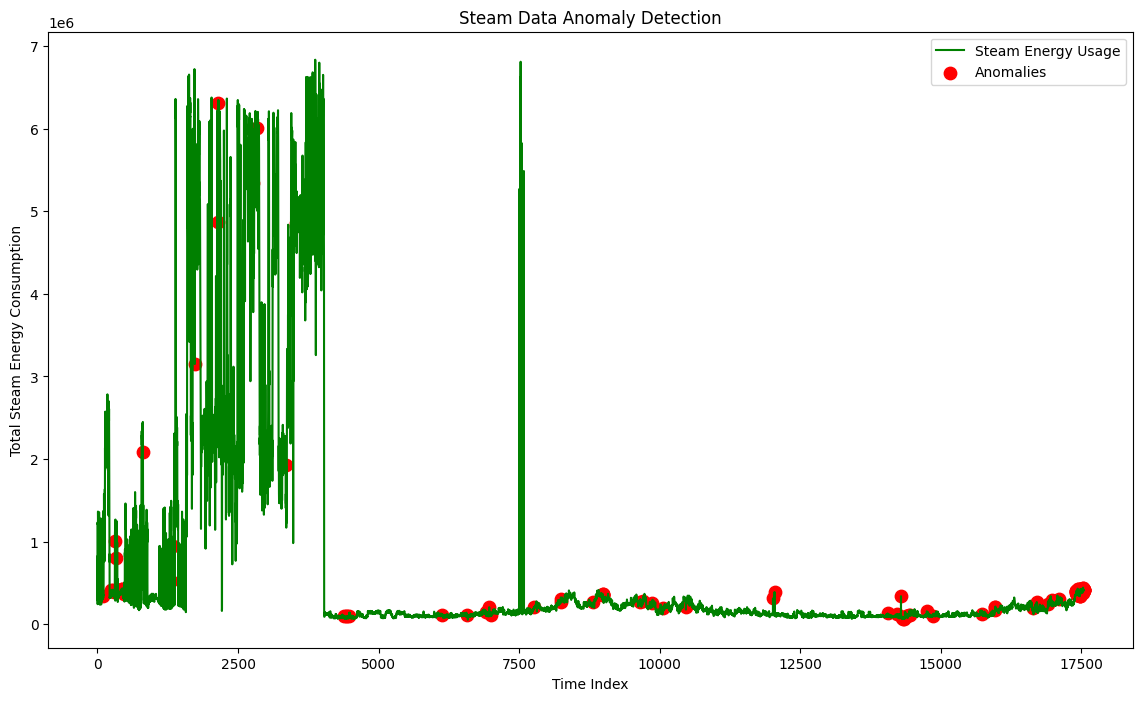

In [59]:
plt.figure(figsize = (14,8)) 

total_usage = x.sum(axis = 1) 

plt.plot(total_usage, label = "Steam Energy Usage", color = 'green')  

anomalies = results['Final_Anomaly'] == 1 

plt.scatter(np.where(anomalies)[0],
            total_usage[anomalies],
            color = 'red',
            s = 80, 
            label = "Anomalies") 

plt.title("Steam Data Anomaly Detection") 
plt.xlabel("Time Index") 
plt.ylabel("Total Steam Energy Consumption")
 
plt.legend() 
plt.show() 

# Explanation of the Graph 

Here, in the graph, we can see that the green line shows the Normal Steam Usage Pattern. The x-axis shows the hourly tiime index and also y-axis shows thesteam consumption data.  

The red dots basically shows the anomaly in the whole data. 

The key patterns shown in the graph include the: 

1. Very high usge at the beginning 
2. Sudden drop aroundIndex of 4000 
3. A single massive spike around 7500
4.  Stable region around 8000-15000  

Now, there can be many reasond for such irregular uses which include: 

1. Equipment Malfunction 

2. Steam leakage 

3. Maintenaance and System Shutdown 

4. sensoe errors and data issues 

In [ ]:
# Now, we will be saving the whole combined data as; 

data_result.to_csv("steam_data_anomaly_results.csv", index = False ) # This is done to remove the unwanted extra column and it does not save the index in file

print("\n✅ DONE! Results saved.")


✅ DONE! Results saved.


In [61]:
results.to_csv("steam_anomaly_model_results.csv", index = False)   

print("\n✅ DONE! Results saved.") 


✅ DONE! Results saved.
